In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import mlflow.sklearn
from mlflow.models import infer_signature
import mlflow

import logging

from urllib.parse import urlparse

In [114]:
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

## Load Dataset

In [115]:
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [117]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


## Exploratory Data Analysis (EDA)

### Check Missing Values

In [118]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

### Feature Distribution

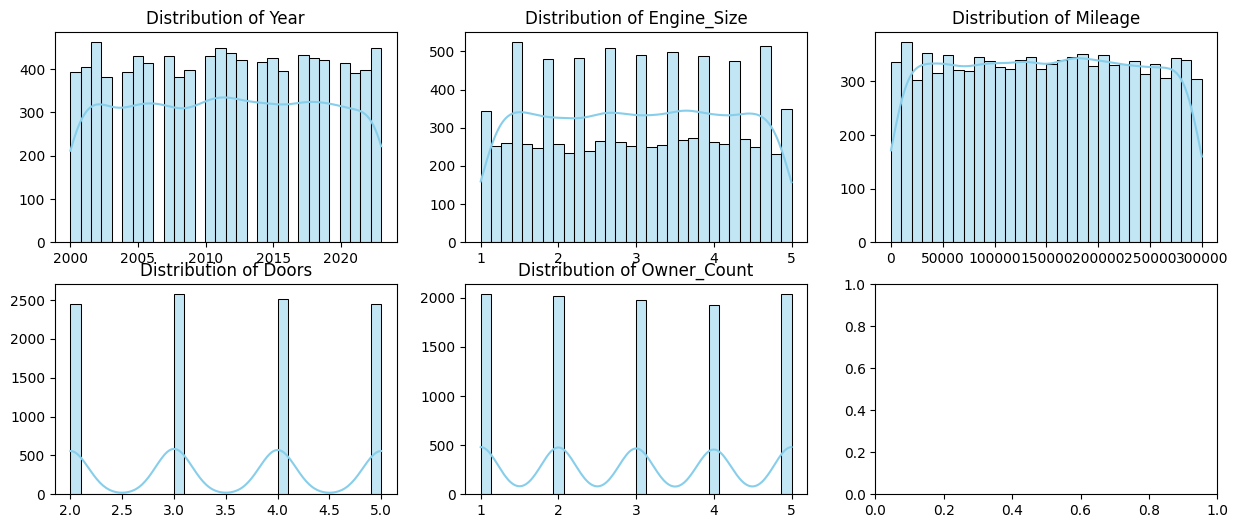

In [119]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.histplot(df.select_dtypes(include='number')[col], ax=ax, kde=True, color='skyblue', bins=30)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

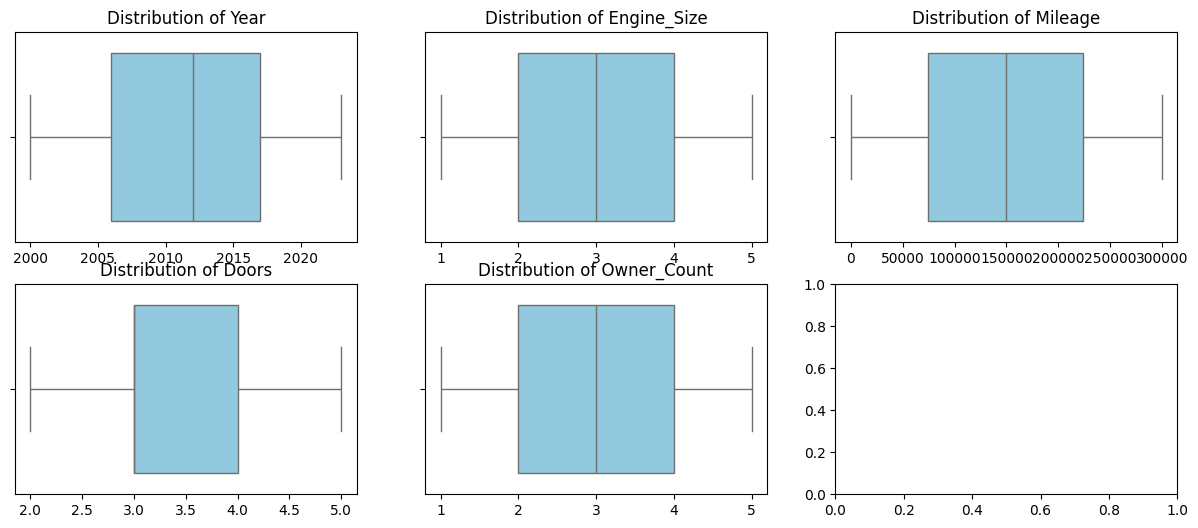

In [120]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.select_dtypes(include='number').columns[:-1], axes)):
    sns.boxplot(df.select_dtypes(include='number')[col], ax=ax, color='skyblue', orient='h')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

### Values Frequency in the Categorical Features

C:\Users\jayaw\AppData\Local\Temp\ipykernel_29168\2154485425.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_29168\2154485425.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_29168\2154485425.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\jayaw\AppData\Local\Temp\ipykernel_29168\2154485425.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

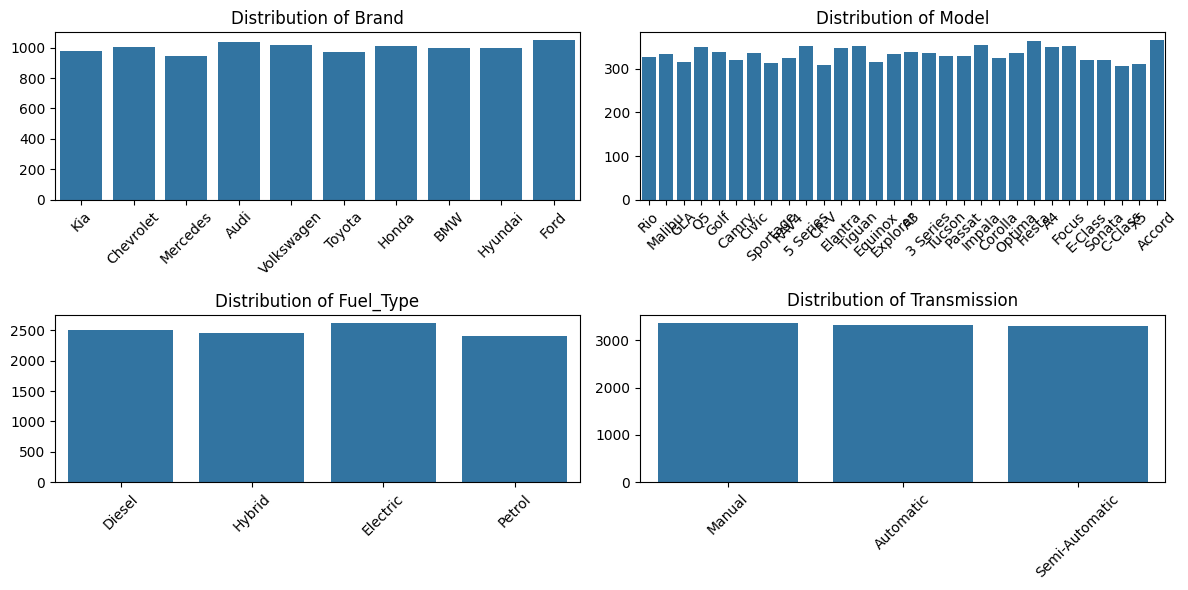

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # 2x2 grid
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns[:len(axes)]  # Ensure we don't exceed subplot count

for col, ax in zip(cat_cols, axes):
    sns.countplot(data=df, x=col, ax=ax)  # Assign ax
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('')

# Hide unused subplots if df has fewer than 4 categorical columns
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Data Preprocessing

Dataset version:
- v1: Label encoding
- v2: One-hot encoding
- v3: Label encoding + MinMax Scaler
- v4: Label encoding + Standard Scaler
- v5: One-hot encoding + MinMax Scaler
- v6: One-hot encoding + Standard Scaler

In [122]:
categorical_cols = df.select_dtypes(include='object').columns

In [123]:
cols_to_scale = ['Engine_Size', "Mileage", 'Doors', 'Owner_Count']

### Encoding

- ### Label Encoding

In [124]:
df_v1 = df.copy()

In [125]:
le = LabelEncoder()
for i in categorical_cols:
    df_v1[i] = le.fit_transform(df_v1[i])

In [126]:
df_v1.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


- ### One Hot Encoding

In [127]:
df_v2 = df.copy()

In [128]:
def one_hot_encoding(df, categorical_cols):
    for col in categorical_cols:
        dummies = pd.get_dummies(df[col], prefix=col).astype(int)
        col_index = df.columns.get_loc(col) + 1
        for dummy_col in reversed(dummies.columns):
            df.insert(col_index, dummy_col, dummies[dummy_col])
        df.drop(col, axis=1, inplace=True)
    return df

In [129]:
df_v2 = one_hot_encoding(df_v2, categorical_cols)

In [130]:
df_v2.head()

,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,...,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Mileage,Doors,Owner_Count,Price
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,289944,3,5,8501
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,5356,2,3,12092
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,231440,4,2,11171
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,160971,2,1,11780
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,286618,3,3,2867


- ### Label Encoding + MinMax Scaler

In [131]:
df_v3 = df_v1.copy()

In [132]:
for i in cols_to_scale:
    scaler = MinMaxScaler()
    df_v3[i] = scaler.fit_transform(df_v3[[i]])

In [133]:
df_v3.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,0.80,0,1,0.966648,0.333333,1.00,8501
1,2,19,2012,0.25,2,0,0.017775,0.000000,0.50,12092
2,7,16,2020,0.80,0,0,0.771584,0.666667,0.25,11171
3,0,22,2023,0.25,1,1,0.536626,0.000000,0.00,11780
4,9,17,2003,0.40,2,2,0.955558,0.333333,0.50,2867


- ### Label Encoding + Standard Scaler

In [134]:
df_v4 = df_v1.copy()

In [135]:
for i in cols_to_scale:
    scaler = StandardScaler()
    df_v4[i] = scaler.fit_transform(df_v4[[i]])

In [136]:
df_v4.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,1.043657,0,1,1.630075,-0.447821,1.412122,8501
1,2,19,2012,-0.870607,2,0,-1.666895,-1.348689,0.006256,12092
2,7,16,2020,1.043657,0,0,0.952303,0.453046,-0.696677,11171
3,0,22,2023,-0.870607,1,1,0.135915,-1.348689,-1.399610,11780
4,9,17,2003,-0.348535,2,2,1.591543,-0.447821,0.006256,2867


- ### One Hot Encoding + MinMax Scaler

In [137]:
df_v5 = df_v2.copy()

In [138]:
for i in cols_to_scale:
    scaler = MinMaxScaler()
    df_v5[i] = scaler.fit_transform(df_v5[[i]])

In [139]:
df_v5.head()

,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,...,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Mileage,Doors,Owner_Count,Price
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.966648,0.333333,1.00,8501
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.017775,0.000000,0.50,12092
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.771584,0.666667,0.25,11171
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0.536626,0.000000,0.00,11780
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0.955558,0.333333,0.50,2867


- ### One Hot Encoding + Standard Scaler

In [140]:
df_v6 = df_v2.copy()

In [141]:
for i in cols_to_scale:
    scaler = StandardScaler()
    df_v6[i] = scaler.fit_transform(df_v6[[i]])

In [142]:
df_v6.head()

,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen,...,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic,Mileage,Doors,Owner_Count,Price
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1.630075,-0.447821,1.412122,8501
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,-1.666895,-1.348689,0.006256,12092
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0.952303,0.453046,-0.696677,11171
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0.135915,-1.348689,-1.399610,11780
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,1.591543,-0.447821,0.006256,2867


## Train Test Split

In [143]:
# List of datasets
datasets = {'df1': df_v1, 'df2': df_v2, 'df3': df_v3, 'df4': df_v4, 'df5': df_v5, 'df6': df_v6}

# Dictionary to store train and test splits
train_sets = {}
test_sets = {}

# Perform train-test split separately for each dataset
for name, df in datasets.items():
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_sets[name] = train_df  # Store train set
    test_sets[name] = test_df    # Store test set

# Access train and test splits
df_v1_train = train_sets['df1']
df_v1_test = test_sets['df1']

df_v2_train = train_sets['df2']
df_v2_test = test_sets['df2']

df_v3_train = train_sets['df3']
df_v3_test = test_sets['df3']

df_v4_train = train_sets['df4']
df_v4_test = test_sets['df4']

df_v5_train = train_sets['df5']
df_v5_test = test_sets['df5']

df_v6_train = train_sets['df6']
df_v6_test = test_sets['df6']

In [144]:
df_v1_train.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9254,9,17,2007,3.2,2,2,33948,5,4,9721
1561,1,1,2010,4.8,1,2,224853,2,1,9402
1670,5,25,2006,1.9,2,2,13435,3,5,8531
6087,4,6,2019,1.7,0,2,199846,2,3,7503
6669,7,10,2005,3.6,3,0,261,3,2,10694


In [145]:
datasets = [
    ['Label encoding', [df_v1_train[df_v1_train.columns[:-1]], df_v1_train[df_v1_train.columns[-1]], df_v1_test[df_v1_test.columns[:-1]], df_v1_test[df_v1_test.columns[-1]]]],
    ['One-hot encoding', [df_v2_train[df_v2_train.columns[:-1]], df_v2_train[df_v2_train.columns[-1]], df_v2_test[df_v2_test.columns[:-1]], df_v2_test[df_v2_test.columns[-1]]]],
    ['Label encoding + MinMax scaler', [df_v3_train[df_v3_train.columns[:-1]], df_v3_train[df_v3_train.columns[-1]], df_v3_test[df_v3_test.columns[:-1]], df_v3_test[df_v3_test.columns[-1]]]],
    ['Label encoding + Standard scaler', [df_v4_train[df_v4_train.columns[:-1]], df_v4_train[df_v4_train.columns[-1]], df_v4_test[df_v4_test.columns[:-1]], df_v4_test[df_v4_test.columns[-1]]]],
    ['One-hot encoding + MinMax scaler', [df_v5_train[df_v5_train.columns[:-1]], df_v5_train[df_v5_train.columns[-1]], df_v5_test[df_v5_test.columns[:-1]], df_v5_test[df_v5_test.columns[-1]]]],
    ['One-hot encoding + Standard scaler', [df_v6_train[df_v6_train.columns[:-1]], df_v6_train[df_v6_train.columns[-1]], df_v6_test[df_v6_test.columns[:-1]], df_v6_test[df_v6_test.columns[-1]]]]
]

## Model Hyperpparameter

In [146]:
models = [
    {
        'model': RandomForestRegressor(),
        'name': 'Random Forest Regressor',
        'params': {
            'n_estimators': np.arange(50, 201, 50),
            'max_depth': [None] + list(np.arange(10, 51, 10)),
            'min_samples_split': np.arange(2, 11, 2),
            'min_samples_leaf': np.arange(1, 5),
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True, False]
        }
    },
    {
        'model': LinearRegression(),
        'name': 'Linear Regression',
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    {
        'model': DecisionTreeRegressor(random_state=42),
        'name': 'Decision Tree Regressor',
        'params': {
            'max_depth': [None] + list(np.arange(3, 21, 3)),
            'min_samples_split': np.arange(2, 11, 2),
            'min_samples_leaf': np.arange(1, 10),
            'max_features': ['sqrt', 'log2', None],
        }
    },
    {
        'model': SVR(),
        'name': 'Support Vector Regressor',
        'params': {}
    }
]

## Model Training

In [147]:
# Initialize MLflow
mlflow.set_experiment("Car Price Prediction")
mlflow.set_tracking_uri("http://localhost:5000")
tracking_url_type_store=urlparse(mlflow.get_tracking_uri()).scheme

In [148]:
scoring = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

In [150]:
for i in datasets:
    dataset_name = i[0]
    X_train, y_train, X_test, y_test = i[1]
    for j in models:
        run_name=f"{i[0]} + {j['name']}"
        logging.info(f"Training {run_name}...")
        model = RandomizedSearchCV(j['model'], j['params'], cv=3, random_state=42, scoring=scoring, refit='r2')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2, mae = r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)

        signature=infer_signature(X_train,y_train)
        with mlflow.start_run(run_name=run_name):
            mlflow.log_param("model", run_name)
            mlflow.log_params(model.best_params_)
            mlflow.log_metric('r2_score', r2)
            mlflow.log_metric('mean_absolute_error', mae)
            # mlflow.sklearn.log_model(model, "model")

            if tracking_url_type_store !='file':
                mlflow.sklearn.log_model(model,"model",registered_model_name=f"Best {run_name}")
            else:
                mlflow.sklearn.log_model(model,"model",signature=signature)

2025-03-16 03:33:59,924 - INFO - Training Label encoding + Random Forest Regressor...
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:34:51 WARNING mlflow.models.model: Model logged w

🏃 View run Label encoding + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/abaede24d0f24c07b6d92face48a1fea
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


2025/03/16 03:34:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Best Label encoding + Linear Regression'.
2025/03/16 03:34:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best Label encoding + Linear Regression, version 1
Created version '1' of model 'Best Label encoding + Linear Regression'.
2025-03-16 03:34:56,761 - INFO - Training Label encoding + Decision Tree Regressor...


🏃 View run Label encoding + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/338fc07732394d629143848e9798eff8
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:35:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/eea4047705fd4ab0933b24bdbdfbd7a8
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:35:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/4764c27f55294a80bafdb5d63b93b77c
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:35:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/02122d58f5a843298059fee4a96fc84c
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:36:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/438e609321fe49feabe4997af43aee4f
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:36:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/114166f0ba0143929431bca307308a71
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:36:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/eb116b5837be4a05852c89736805284e
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:37:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + MinMax scaler + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/73dbea8c7ea4449f8a199b7a485bd6fb
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


2025/03/16 03:37:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Best Label encoding + MinMax scaler + Linear Regression'.
2025/03/16 03:37:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best Label encoding + MinMax scaler + Linear Regression, version 1
Created version '1' of model 'Best Label encoding + MinMax scaler + Linear Regression'.
2025-03-16 03:37:23,469 - INFO - Training Label encoding + MinMax scaler + Decision Tree Regressor...


🏃 View run Label encoding + MinMax scaler + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/09666b92c75743a18f2d024bb66c84ce
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:37:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + MinMax scaler + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/251a4bf16ba044c2a81d0608ad0d09b1
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:37:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + MinMax scaler + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/48c470672c1f47cc9433bee57a53240c
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:38:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + Standard scaler + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/c7bdcba23ccc4bdfbc19989775be53c9
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


2025/03/16 03:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Best Label encoding + Standard scaler + Linear Regression'.
2025/03/16 03:38:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best Label encoding + Standard scaler + Linear Regression, version 1
Created version '1' of model 'Best Label encoding + Standard scaler + Linear Regression'.
2025-03-16 03:38:43,349 - INFO - Training Label encoding + Standard scaler + Decision Tree Regressor...


🏃 View run Label encoding + Standard scaler + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/4fad60403874463d857607079660a13e
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:38:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + Standard scaler + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/d9867ed4e09d4136b40ae0b179b9ea75
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:39:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run Label encoding + Standard scaler + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/6523e1a066d74b45b99f7d0b59f03214
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:39:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + MinMax scaler + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/807dedc0e93240a3af80f0edf61b5abf
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:39:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + MinMax scaler + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/1f170042640a4697ae8a314a11aeaeb8
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:39:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + MinMax scaler + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/e88dc5799591449c9aafe4d0bb11a588
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:40:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + MinMax scaler + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/f766f1447b6b44089ad8015df2f81561
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:40:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Standard scaler + Random Forest Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/b9ddb874bc20432cbd9d47d69a047a02
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:41:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Standard scaler + Linear Regression at: http://localhost:5000/#/experiments/672269801079838143/runs/6caa6f8686844a069cf445b402a455f5
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:41:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Standard scaler + Decision Tree Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/757fedb229724bcba78de8b1664b1188
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/03/16 03:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when loggin

🏃 View run One-hot encoding + Standard scaler + Support Vector Regressor at: http://localhost:5000/#/experiments/672269801079838143/runs/0518ea06602840fb8df7a91f383d7f45
🧪 View experiment at: http://localhost:5000/#/experiments/672269801079838143


Created version '1' of model 'Best One-hot encoding + Standard scaler + Support Vector Regressor'.
